In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from loading_data import * 
from sklearn.metrics import accuracy_score
from tqdm import tqdm

plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})


In [2]:
X_train, y_train, X_test, y_test = load_data()

In [3]:
print(X_train.shape)
# X_train représente 1000 images de 64*64 pixels
print(y_train.shape)
# y_train represente un vecteur de 1000 données (0 ou 1) avec 0 pour chat et 1 pour chien 
print(np.unique(y_train, return_counts = True)) # le data set est symétrique autant de chiens que de chats

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


In [4]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts = True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


In [5]:
def affiche_image_train(i):
    """ Cette fonction affiche l'image à la position i dans X_train"""
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])

    

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


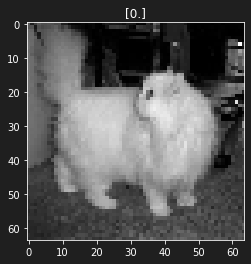

In [6]:
affiche_image_train(3)

In [7]:
def affiche_images_train():
    plt.figure(figsize = (16,8))
    for i in range(1,10):
        plt.subplot(4, 5, i)
        plt.imshow(X_train[i], cmap = 'gray')
        plt.title(y_train[i])
        plt.tight_layout()
    plt.show()

In [8]:
def affiche_image_test(i):
    """ Cette fonction affiche l'image à la position i dans X_tes"""
    plt.imshow(X_test[i], cmap='gray')

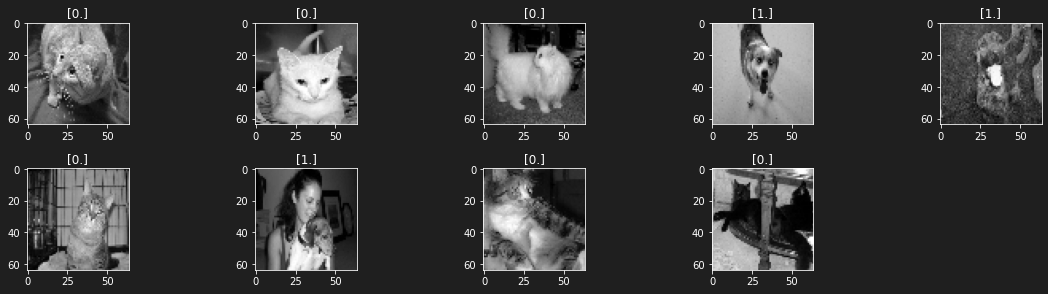

In [9]:
affiche_images_train()

### Etapes à réaliser :

1) normaliser le data_set (0,225) -> (0,1) chaque pixel possède une valeur de couleur 

2) flatten() le data_set et en particulier chaques images (64*64) -> (4096) et le data set_set complet (1000,64,64) -> (1000,4096) en quelque sort on applati les images

3) écriture de nos fonctions d'apprentissages (init, model, log_loss/coût, gradients, modif_gradient, ...)

4) Creer la fonction final de l'entrainement du neurone artificielle, tracer le log_loss, calcul de l'accuracy avec sklearn

In [10]:
def normalise(X):
    """ cette fonction noramlise le data_set grace au min et au max"""
    return (X - np.min(X)) / (np.max(X) - np.min(X))

In [11]:
def flatten(X):
    """ cette fonction permet de reshape le data_set selon nos besoin. il applatit toutes les image -> data (1000, 64*64)"""
    return X.reshape(X.shape[0], -1) # le -1 permet de mettre tout ce qu'il reste on aurait pu mettre 64*64

In [12]:
X_train_norm = normalise(X_train)
print((np.min(X_train_norm) , np.max(X_train_norm))) # les valeurs sont bien entre 0 et 1 

(0.0, 1.0)


In [13]:
X_train_n_f = flatten(X_train_norm)
print(X_train_n_f.shape) # on a bien applatit toutes les images. data_set = 1000 images applatit en 4096 pixels

(1000, 4096)


In [14]:
X_train_n_f

array([[0.64566929, 0.68503937, 0.64173228, ..., 0.34251969, 0.70866142,
        0.15354331],
       [0.16535433, 0.16929134, 0.15354331, ..., 0.21653543, 0.20472441,
        0.21653543],
       [0.10629921, 0.1023622 , 0.11417323, ..., 0.53149606, 0.55511811,
        0.47637795],
       ...,
       [0.18503937, 0.26771654, 0.55905512, ..., 0.79527559, 0.79527559,
        0.7992126 ],
       [0.99212598, 0.99212598, 0.99212598, ..., 0.2519685 , 0.25984252,
        0.23228346],
       [0.48031496, 0.49606299, 0.51181102, ..., 0.63385827, 0.62992126,
        0.62992126]])

#### Le but ici sera donc d'associer à chaque variable ( pixels ) une valeur w qui evoluera.
- Notre fonction l'inéaire du neurone sera donc de la forme : w1p1 + w2p2 + ... + w4096p4096 + b (pour chaques images / lignes)

In [15]:
def init(X):
    """ cette fonction associe à chaque valeur i en ligne de X un w[i] et à la fin un b """
    W = np.random.randn(X.shape[1],1) # en effet on veut autant de w[i] que de colonnes du data_set ( pixels par photos) 
    # les w[i] sont les memes pour toutes les images ( pour chaques lignes)
    b = np.random.randn(1) # b est le meme pour toutes les imges
    return (W,b)

In [16]:
def model(X, W, b):
    """ Cette fonction permet de créer la fonction linéaire Z ainsi que la fonction d'activation sigmoïde A qui renvoie
    une proba d'appartenir à 0 ou 1"""
    Z = X.dot(W) + b # Z(x1,x2,...,x4096) = w1x1 + w2x2 + ... + w4096x4096 + b
    A = 1 / (1 + np.exp(-Z)) # la normalisation permet de ne pas mettre de trop grande valeurs dans exp qui pourrait erreurs
    return A

In [17]:
def log_loss(A,y):
    """ Cette fonction le cout, l'erreur du model c'est la log vraissemblance cette valeur est dans [0,100], le but = 0. 
    Nous devons penser à ajouter un epsilon très petit dans le log afin que d'éviter les log(0)"""
    epsilon = 1e-15
    L = ( -1/len(y) ) * np.sum( y * np.log( A + epsilon ) + ( 1 - y ) * np.log( 1 - A + epsilon ))
    return L

In [18]:
def gradients(X, y, A):
    """ Cette fonction retourn les gradient dw et db (dérivée en fonction de la log_loss)"""
    dw = ( 1 / len(y) ) * np.dot(X.T , A - y ) # matrice jacobienne ()
    db = ( 1 / len(y) ) * np.sum( A - y )
    return (dw , db)

In [19]:
def update(W , b , dw , db , pas):
    """ Cette fonction va mettre à jour W et b à une seule étape. Bien penser à mettre un - """
    W = W - pas * dw 
# les parametre vont dont évoluer dans le sens de la descent de gradient afin de trouver W tel que log_loss est maximiser/minimier
    b =  b - pas * db 
    return (W , b)

In [20]:
def predict(X, W, b):
    """ proba que l'animal soit dans la catégorie 1 """
    A = model(X, W, b )
    return A >= 0.5

In [21]:
W, b = init(X_train_n_f)
A = model(X_train_n_f, W, b)

In [22]:
print(log_loss(A,y_train)) # log_loss est donc bien juste une valeure 
print(gradients(X_train_n_f , y_train, A)[0].shape) # gradient de W a bien la même dim que de que W et db est bien une valeur

6.766902509146467
(4096, 1)


In [23]:
def neurone(X, y, pas, niter):
    """ Cette fonction va renvoyer les parametre perfect apres la dscente de gradiens"""
    
    W , b = init(X)
    log_courbe = []
    accuracy_courbe= []
    
    for i in tqdm(range (niter)):
        
        A = model(X , W , b)
        
        if i%10 == 0:
            log_courbe.append(log_loss(A , y))
            accuracy_courbe.append( accuracy_score( predict(X, W, b) , y ) )
            
        dw , db = gradients(X , y , A)
        W , b = update(W , b , dw , db , pas)
    
    accuracy_score_s = accuracy_score( predict(X , W , b) , y )
    print("ce model est précis à : " + str(accuracy_score_s))
    plt.plot(log_courbe)
    plt.show()
    plt.plot(accuracy_courbe)
    plt.show()
    
    return (W , b)
        
        
    

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:52<00:00, 191.96it/s]


ce model est précis à : 0.709


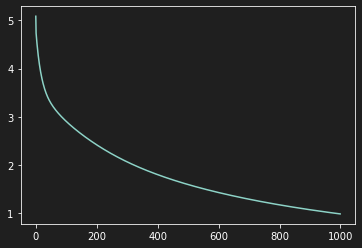

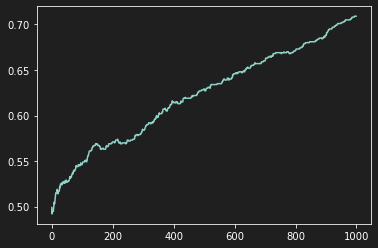

(array([[ 1.59091235],
        [-0.70958407],
        [-1.27200324],
        ...,
        [ 0.56666905],
        [ 0.06837109],
        [ 0.41916995]]),
 array([-2.10389184]))

In [24]:
neurone(X_train_n_f , y_train , 0.01 , 10000)

In [25]:
X_test_norm = normalise(X_test)
X_test_n_f = flatten(X_test_norm)
X_test_n_f.shape

(200, 4096)

In [26]:
def artificial_neuron_popu(X, y, X_test, y_test, pas, niter):
    W , b = init(X)
    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []
    
    for i in tqdm(range(niter)):
        
        A = model(X,W,b)
        
        train_loss.append(log_loss(A,y))
        train_acc.append(accuracy_score(predict(X,W,b) , y))
        
        A_test = model(X_test,W,b)
        test_loss.append(log_loss(A_test,y_test))
        test_acc.append((accuracy_score(predict(X_test,W,b) , y_test)))
        
        dw , db = gradients(X , y , A)
        W , b = update(W , b , dw , db , pas)
        
    print("le taux d'erreur du modèle sur les donnée test est de : " + str(accuracy_score(predict(X_test , W, b), y_test )))
        
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.legend()
    plt.show()

    return (W, b)

        
        
    


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:09<00:00, 144.09it/s]


le taux d'erreur du modèle sur les donnée test est de : 0.5


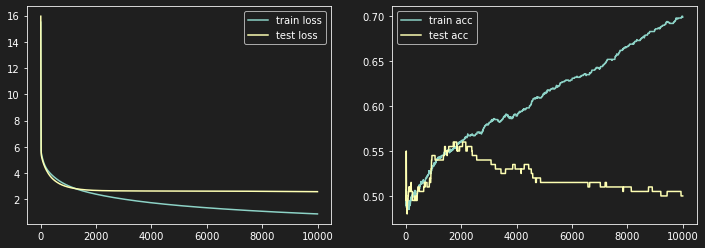

(array([[-0.3857639 ],
        [-0.39997917],
        [-1.27347531],
        ...,
        [-0.83950579],
        [-1.39146961],
        [-0.4724033 ]]),
 array([-1.20643506]))

In [27]:
artificial_neuron_popu(X_train_n_f , y_train , X_test_n_f , y_test , 0.01 , 10000 )

In [28]:
def un_individu_test(X , y , donnee, pas , niter):
    """ Cette fonction apprend le model et trouve la catégorie de la nouvelle donnée qui peut etre un tableau ou un individu"""
    
    W , b = init(X)
    log_courbe = []
    accuracy_courbe= []
    
    W , b = neurone(X , y , pas , niter)
    
    donne_pred = predict(donnee, W , b)
    proba_donnee = model(donnee , W , b)
    if donne_pred:
        print("c'est un chien")
        print("cette réponse est sur à : " + str(proba_donnee * 100) + " %")
    else:
        print("c'est un chat")
        print("cette réponse est sur à : " + str(proba_donnee * 100) + " %")
    return (W,b)
    
    

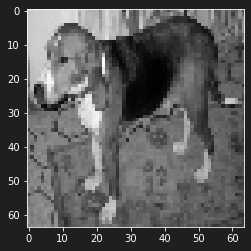

In [29]:
affiche_image_test(73)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:27<00:00, 358.58it/s]


ce model est précis à : 0.725


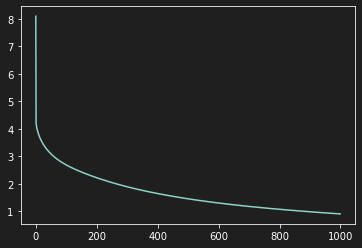

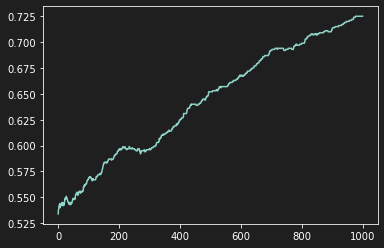

c'est un chien
cette réponse est sur à : [80.63084011] %


(array([[-2.01628114],
        [ 0.40329469],
        [-1.12733088],
        ...,
        [-0.29876661],
        [-0.6350288 ],
        [-0.97985489]]),
 array([-0.8527457]))

In [30]:
un_individu_test(X_train_n_f , y_train , X_test_n_f[73], 0.01 , 10000 ) # sur 1000 photo train le modèle fait 300 erreur